# Imports and defs for lecture

In [1]:
# These are the standard imports for CS 111. 
# This list may change as the quarter goes on.

import os
import math
import time
import struct
import json
import pandas as pd
import networkx as nx
import numpy as np
import numpy.linalg as npla
import scipy
import scipy.sparse.linalg as spla
from scipy import sparse
from scipy import linalg
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
%matplotlib tk


# Lecture starts here

In [2]:
help(integrate.solve_ivp)


Help on function solve_ivp in module scipy.integrate._ivp.ivp:

solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, **options)
    Solve an initial value problem for a system of ODEs.
    
    This function numerically integrates a system of ordinary differential
    equations given an initial value::
    
        dy / dt = f(t, y)
        y(t0) = y0
    
    Here t is a one-dimensional independent variable (time), y(t) is an
    n-dimensional vector-valued function (state), and an n-dimensional
    vector-valued function f(t, y) determines the differential equations.
    The goal is to find y(t) approximately satisfying the differential
    equations, given an initial value y(t0)=y0.
    
    Some of the solvers support integration in the complex domain, but note that
    for stiff ODE solvers, the right-hand side must be complex-differentiable
    (satisfy Cauchy-Riemann equations [11]_). To solve a problem in the complex
    doma

Text(0.5,1,'ydot = y/2')

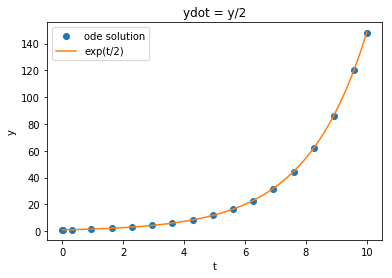

In [4]:
# demo of ode23tx.m = rk23.py
def f(t, y):
    """function to be integrated to solve an ODE or a system of ODEs
    Input:
      t is a scalar time
      y is a vector of variables
    Output:
      ydot is the vector dy/dt
    """
    ydot = y/2
    return ydot

tspan = (0,10)
yinit = [1]

sol = integrate.solve_ivp(fun = f, t_span = tspan, y0 = yinit, method = 'RK23')

%matplotlib inline
plt.plot(sol.t, sol.y[0], 'o', label='ode solution')
tt = np.linspace(0, 10, 100)
plt.plot(tt, np.exp(tt/2), label='exp(t/2)')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('ydot = y/2')

In [5]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 53
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.02715322,  0.29868543,  0.95488141,  1.61884239,
        2.28297417,  2.94710595,  3.61123773,  4.27536951,  4.93950128,
        5.60363306,  6.26776484,  6.93189662,  7.5960284 ,  8.26016018,
        8.92429195,  9.58842373, 10.        ])
 t_events: None
        y: array([[  1.        ,   1.01366919,   1.16105609,   1.6113237 ,
          2.2448704 ,   3.12778345,   4.35794837,   6.07194019,
          8.4600492 ,  11.78740736,  16.42342367,  22.88279661,
         31.8826568 ,  44.42218415,  61.89353846,  86.23641939,
        120.15341527, 147.59825645]])

Text(0.5,1,'ydot = -y/2')

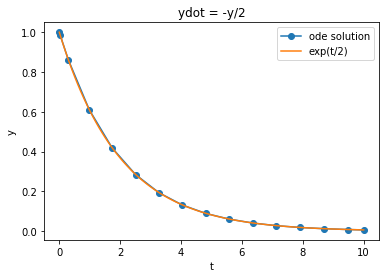

In [11]:
# demo of ode23tx.m = rk23.py
def f(t, y):
    """function to be integrated to solve an ODE or a system of ODEs
    Input:
      t is a scalar time
      y is a vector of variables
    Output:
      ydot is the vector dy/dt
    """
    ydot = - y/2
    return ydot

tspan = (0,10)
yinit = [1]

sol = integrate.solve_ivp(fun = f, t_span = tspan, y0 = yinit, method = 'RK23')

%matplotlib inline
#plt.plot(sol.t, sol.y[0], label='ode solution')
plt.plot(sol.t, sol.y[0], 'o-', label='ode solution')
tt = np.linspace(0, 10, 100)
plt.plot(tt, np.exp(-tt/2), label='exp(t/2)')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('ydot = -y/2')

In [ ]:
# demo of ode23tx.m = rk23.py
def f(t, y):
    """function to be integrated to solve an ODE or a system of ODEs
    Input:
      t is a scalar time
      y is a vector of variables
    Output:
      ydot is the vector dy/dt
    """
    ydot = t/2
    return ydot

tspan = (0,10)
yinit = [1]

sol = integrate.solve_ivp(fun = f, t_span = tspan, 
                          y0 = yinit, method = 'RK23')

%matplotlib inline
#plt.plot(sol.t, sol.y[0], 'o', label='ode solution')
plt.plot(sol.t, sol.y[0], 'o-', label='ode solution')
tt = np.linspace(0, 10, 100)
plt.plot(tt, tt**2/4 + 1, label='t**2/4 + 1')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('ydot = t/2')

Text(0.5,1,'ydot = t/2')

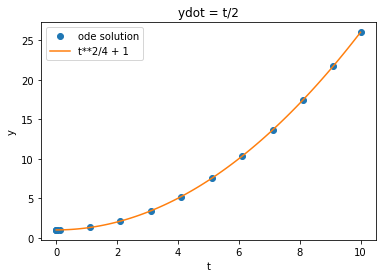

In [12]:
# demo of ode23tx.m = rk23.py
def f(t, y):
    """function to be integrated to solve an ODE or a system of ODEs
    Input:
      t is a scalar time
      y is a vector of variables
    Output:
      ydot is the vector dy/dt
    """
    ydot = t/2
    return ydot

tspan = (0,10)
yinit = [1]

sol = integrate.solve_ivp(fun = f, t_span = tspan, 
                          y0 = yinit, method = 'RK23', max_step = 1)

%matplotlib inline
plt.plot(sol.t, sol.y[0], 'o', label='ode solution')
tt = np.linspace(0, 10, 100)
plt.plot(tt, tt**2/4 + 1, label='t**2/4 + 1')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('ydot = t/2')

### Non-Linear examples

Text(0.5,1,'Lotka-Volterra starting with 300 rabbits and 150 foxes')

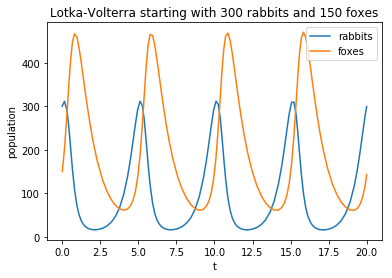

In [13]:
# demo of lotka-volterra equations
def lotka(t, y):
    """function to be integrated to solve the Lotka-Volterra equations
    Input:
      t is time (scalar)
      y is [rabbits(t), foxes(t)]
    Output:
      ydot is the vector dy/dt
    """
    alpha = .01
    ydot = [2*y[0] - alpha*y[0]*y[1],
             -y[1] + alpha*y[0]*y[1]  ]
    return ydot

tspan = (0,20)
rabbits_0 = 300
foxes_0   = 150
yinit = [rabbits_0, foxes_0]

sol = integrate.solve_ivp(fun = lotka, t_span = tspan, y0 = yinit, method = 'RK23')

%matplotlib inline
plt.plot(sol.t, sol.y[0], label = 'rabbits')
plt.plot(sol.t, sol.y[1], label = 'foxes')
plt.legend()
plt.xlabel('t')
plt.ylabel('population')
plt.title('Lotka-Volterra starting with %d rabbits and %d foxes' % (rabbits_0, foxes_0))

Text(0.5,1,'Lotka-Volterra starting with 15 rabbits and 22 foxes')

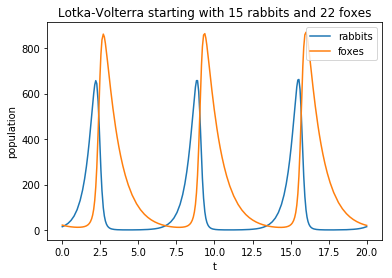

In [14]:
# demo of lotka-volterra equations
def lotka(t, y):
    """function to be integrated to solve the Lotka-Volterra equations
    Input:
      t is time (scalar)
      y is [rabbits(t), foxes(t)]
    Output:
      ydot is the vector dy/dt
    """
    alpha = .01
    ydot = [2*y[0] - alpha*y[0]*y[1],
             -y[1] + alpha*y[0]*y[1]  ]
    return ydot

tspan = (0,20)
rabbits_0 = 15
foxes_0   = 22
yinit = [rabbits_0, foxes_0]

sol = integrate.solve_ivp(fun = lotka, t_span = tspan, y0 = yinit, method = 'RK23')

%matplotlib inline
plt.plot(sol.t, sol.y[0], label = 'rabbits')
plt.plot(sol.t, sol.y[1], label = 'foxes')
plt.legend()
plt.xlabel('t')
plt.ylabel('population')
plt.title('Lotka-Volterra starting with %d rabbits and %d foxes' % (rabbits_0, foxes_0))

Text(0.5,1,'Lotka-Volterra starting with 102 rabbits and 198 foxes')

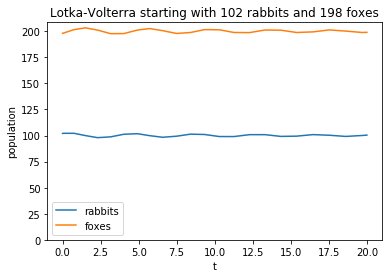

In [15]:
# demo of lotka-volterra equations
def lotka(t, y):
    """function to be integrated to solve the Lotka-Volterra equations
    Input:
      t is time (scalar)
      y is [rabbits(t), foxes(t)]
    Output:
      ydot is the vector dy/dt
    """
    alpha = .01
    ydot = [2*y[0] - alpha*y[0]*y[1],
             -y[1] + alpha*y[0]*y[1]  ]
    return ydot

tspan = (0,20)
rabbits_0 = 102
foxes_0   = 198
yinit = [rabbits_0, foxes_0]

sol = integrate.solve_ivp(fun = lotka, t_span = tspan, y0 = yinit, method = 'RK23')

%matplotlib inline
plt.plot(sol.t, sol.y[0], label = 'rabbits')
plt.plot(sol.t, sol.y[1], label = 'foxes')
plt.gca().set_ylim([0,None])
plt.legend()
plt.xlabel('t')
plt.ylabel('population')
plt.title('Lotka-Volterra starting with %d rabbits and %d foxes' % (rabbits_0, foxes_0))

Text(0.5,1,'Lotka-Volterra starting with 100 rabbits and 200 foxes')

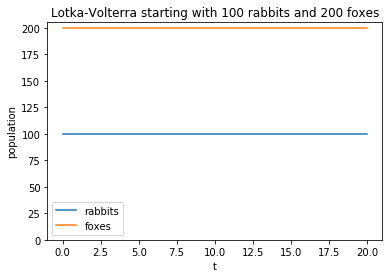

In [16]:
# demo of lotka-volterra equations
def lotka(t, y):
    """function to be integrated to solve the Lotka-Volterra equations
    Input:
      t is time (scalar)
      y is [rabbits(t), foxes(t)]
    Output:
      ydot is the vector dy/dt
    """
    alpha = .01
    ydot = [2*y[0] - alpha*y[0]*y[1],
             -y[1] + alpha*y[0]*y[1]  ]
    return ydot

tspan = (0,20)
rabbits_0 = 100
foxes_0   = 200
yinit = [rabbits_0, foxes_0]

sol = integrate.solve_ivp(fun = lotka, t_span = tspan, y0 = yinit, method = 'RK23')

%matplotlib inline
plt.plot(sol.t, sol.y[0], label = 'rabbits')
plt.plot(sol.t, sol.y[1], label = 'foxes')
plt.gca().set_ylim([0,None])
plt.legend()
plt.xlabel('t')
plt.ylabel('population')
plt.title('Lotka-Volterra starting with %d rabbits and %d foxes' % (rabbits_0, foxes_0))

In [17]:

# demo of lotka-volterra equations
def lotka(t, y):
    """function to be integrated to solve the Lotka-Volterra equations
    Input:
      t is time (scalar)
      y is [rabbits(t), foxes(t)]
    Output:
      ydot is the vector dy/dt
    """
    alpha = .01
    ydot = [2*y[0] - alpha*y[0]*y[1],
             -y[1] + alpha*y[0]*y[1]  ]
    return ydot

tspan = (0,20)
rabbits_0 = 300
foxes_0   = 150
yinit = [rabbits_0, foxes_0]

sol = integrate.solve_ivp(fun = lotka, t_span = tspan, y0 = yinit, method = 'RK23')

print('sol.t:', sol.t.shape)
print('sol.y:', sol.y.shape)
for i in range(len(sol.t)):
    print('time: %5.2f  rabbits: %5.1f  foxes: %5.1f' % (sol.t[i], sol.y[0,i], sol.y[1,i]))

sol.t: (107,)
sol.y: (2, 107)
time:  0.00  rabbits: 300.0  foxes: 150.0
time:  0.01  rabbits: 301.9  foxes: 154.0
time:  0.15  rabbits: 311.2  foxes: 202.7
time:  0.31  rabbits: 291.1  foxes: 282.4
time:  0.43  rabbits: 253.6  foxes: 347.7
time:  0.55  rabbits: 204.3  foxes: 406.6
time:  0.67  rabbits: 154.9  foxes: 447.5
time:  0.80  rabbits: 110.3  foxes: 466.3
time:  0.96  rabbits:  72.8  foxes: 459.3
time:  1.10  rabbits:  51.6  foxes: 435.5
time:  1.23  rabbits:  38.1  foxes: 403.3
time:  1.37  rabbits:  29.4  foxes: 367.8
time:  1.51  rabbits:  23.8  foxes: 331.2
time:  1.67  rabbits:  20.0  foxes: 293.6
time:  1.84  rabbits:  17.6  foxes: 255.2
time:  2.04  rabbits:  16.4  foxes: 216.2
time:  2.29  rabbits:  16.6  foxes: 176.2
time:  2.64  rabbits:  19.6  foxes: 131.7
time:  2.94  rabbits:  25.1  foxes: 104.5
time:  3.24  rabbits:  34.4  foxes:  84.5
time:  3.50  rabbits:  47.7  foxes:  72.1
time:  3.77  rabbits:  67.9  foxes:  64.3
time:  4.04  rabbits:  98.1  foxes:  61.2
time

Text(0.5,1,'Phase space plot')

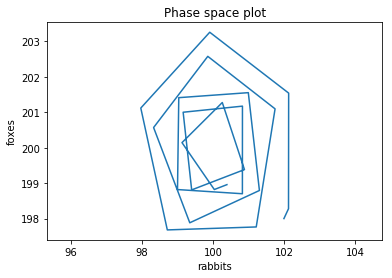

In [19]:
# demo of lotka-volterra equations
def lotka(t, y):
    """function to be integrated to solve the Lotka-Volterra equations
    Input:
      t is time (scalar)
      y is [rabbits(t), foxes(t)]
    Output:
      ydot is the vector dy/dt
    """
    alpha = .01
    ydot = [2*y[0] - alpha*y[0]*y[1],
             -y[1] + alpha*y[0]*y[1]  ]
    return ydot

tspan = (0,20)
#rabbits_0 = 300
#foxes_0   = 150
rabbits_0 = 102
foxes_0   = 198
yinit = [rabbits_0, foxes_0]

sol = integrate.solve_ivp(fun = lotka, t_span = tspan, y0 = yinit, method = 'RK23')

%matplotlib inline
plt.plot(sol.y[0], sol.y[1])
plt.axis('equal')
plt.xlabel('rabbits')
plt.ylabel('foxes')
plt.title('Phase space plot')
